# Keras 2.0

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
keras.__version__

'2.2.4-tf'

<img src="imagens/keras2.png" alt="drawing" width="600"/>

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## API Sequential

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
model.layers[1].name

'dense_3'

In [14]:
W,b = model.get_layer('dense_3').get_weights()

In [15]:
W.shape, b.shape

((784, 300), (300,))

In [16]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [17]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0909 10:36:24.474206 4563617216 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10


W0909 10:36:24.753048 4563617216 deprecation.py:323] From /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


55000/55000 [==============================] - 6s 103us/sample - loss: 0.7243 - accuracy: 0.7639 - val_loss: 0.5125 - val_accuracy: 0.8270
Epoch 2/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4838 - accuracy: 0.8313 - val_loss: 0.4639 - val_accuracy: 0.8420
Epoch 3/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4385 - accuracy: 0.8465 - val_loss: 0.4409 - val_accuracy: 0.8430
Epoch 4/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4123 - accuracy: 0.8541 - val_loss: 0.4064 - val_accuracy: 0.8584
Epoch 5/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3933 - accuracy: 0.8619 - val_loss: 0.4077 - val_accuracy: 0.8606
Epoch 6/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3770 - accuracy: 0.8665 - val_loss: 0.3732 - val_accuracy: 0.8714
Epoch 7/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3648 - accuracy: 0.8707 - val_los

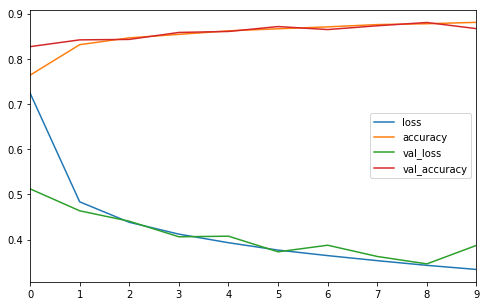

In [18]:
pd.DataFrame(h.history).plot(figsize = (8,5))

In [19]:
model.evaluate(X_test, y_test, verbose = 0)

W0909 10:37:44.244345 4563617216 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


[100.81444536132813, 0.7902]

In [20]:
X_new = X_test[:3]

In [21]:
y_proba = model.predict(X_new)
y_proba.round(2)

W0909 10:38:26.401381 4563617216 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

W0909 10:38:28.891695 4563617216 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


array([9, 2, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## API Functional

In [9]:
input = keras.layers.Input(shape=[28, 28])
h0 = keras.layers.Flatten()(input)
h1 = keras.layers.Dense(300, activation="relu")(h0)
h2 = keras.layers.Dense(200, activation="relu")(h1)
h3 = keras.layers.Dense(100, activation="relu")(h2)
h4 = keras.layers.Dense( 50, activation="relu")(h3)
concat = keras.layers.Concatenate()([h1, h4])
output = keras.layers.Dense(10, activation="softmax")(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [10]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [11]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0909 15:13:51.957574 4553237952 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10


W0909 15:13:52.257007 4553237952 deprecation.py:323] From /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


55000/55000 [==============================] - 6s 118us/sample - loss: 0.7324 - accuracy: 0.7658 - val_loss: 0.5267 - val_accuracy: 0.8236
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.5016 - accuracy: 0.8265 - val_loss: 0.4688 - val_accuracy: 0.8408
Epoch 3/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4561 - accuracy: 0.8410 - val_loss: 0.4552 - val_accuracy: 0.8428
Epoch 4/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4289 - accuracy: 0.8487 - val_loss: 0.4179 - val_accuracy: 0.8594
Epoch 5/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4083 - accuracy: 0.8568 - val_loss: 0.4191 - val_accuracy: 0.8546
Epoch 6/10
55000/55000 [==============================] - 7s 121us/sample - loss: 0.3906 - accuracy: 0.8637 - val_loss: 0.3799 - val_accuracy: 0.8702
Epoch 7/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3770 - accuracy: 0.8672 - v

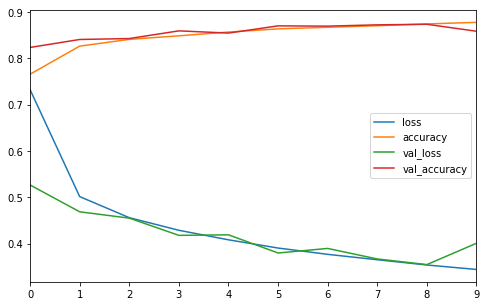

In [12]:
pd.DataFrame(h.history).plot(figsize = (8,5))

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 300)          235500      flatten[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          60200       dense[0][0]                      
______________________________________________________________________________________________

In [14]:
model.save('mod_fun.h5')

In [15]:
model_clone = keras.models.load_model('mod_fun.h5')

W0909 15:14:55.513956 4553237952 deprecation.py:323] From /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1423: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
yhat = model_clone.predict(X_test)

W0909 15:14:55.743201 4553237952 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


In [17]:
yhat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Um Autocodificador

In [18]:
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)
X_valid_flat = X_valid.reshape(-1, 784)

In [19]:
input_dim = 784
inter_dim = 64
latent_dim = 32

In [20]:
x = keras.layers.Input(shape = (input_dim, ))
h1 = keras.layers.Dense(inter_dim, activation='relu')(x)
h2 = keras.layers.Dense(latent_dim, activation='relu')(h1)
h3 = keras.layers.Dense(inter_dim, activation='relu')(h2)
yhat = keras.layers.Dense(input_dim, activation='sigmoid')(h3) 

ACf = keras.models.Model(inputs = x, outputs = yhat)

In [21]:
ACf.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
h = ACf.fit(X_train_flat, X_train_flat, 
           epochs = 10, shuffle=True,
           validation_data = (X_valid_flat, X_valid_flat))

W0909 15:14:56.245413 4553237952 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3215 - val_loss: 0.2948
Epoch 2/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.2934 - val_loss: 0.2877
Epoch 3/10
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2877 - val_loss: 0.2831
Epoch 4/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.2845 - val_loss: 0.2803
Epoch 5/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.2825 - val_loss: 0.2793
Epoch 6/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.2812 - val_loss: 0.2779
Epoch 7/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.2803 - val_loss: 0.2771
Epoch 8/10
55000/55000 [==============================] - 5s 91us/sample - loss: 0.2796 - val_loss: 0.2767
Epoch 9/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.2790 - val_loss: 0.2760
Epoch 10/10
55000/55000 [===========

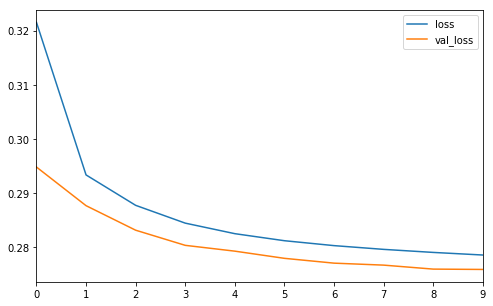

In [23]:
pd.DataFrame(h.history).plot(figsize = (8,5))

In [24]:
def show_results(model, X_test, limit = 10):
    decoded_imgs = model.predict(X_test)
    # Keras implementation results
    plt.figure(figsize=(20, 4))
    for i in range(limit):
        # Original
        subplot = plt.subplot(2, limit, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        subplot.get_xaxis().set_visible(False)
        subplot.get_yaxis().set_visible(False)

        # Reconstruction
        subplot = plt.subplot(2, limit, i + 11)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        subplot.get_xaxis().set_visible(False)
        subplot.get_yaxis().set_visible(False)
    plt.show()

W0909 15:15:47.337752 4553237952 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


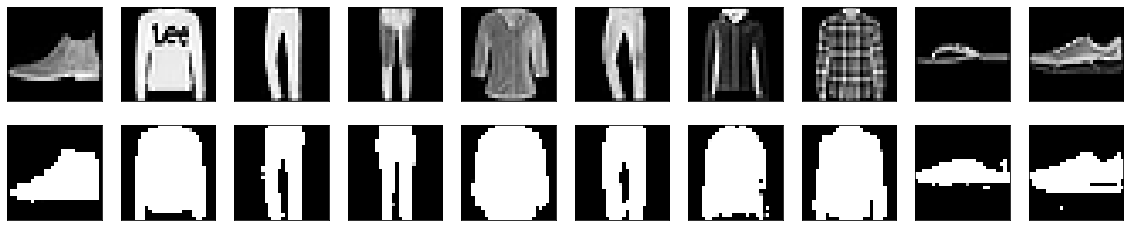

In [25]:
show_results(ACf, X_test_flat)

## API Subclassing

#### Uma versao OO WideAndDeepModel 

In [48]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, activation="relu", **kwargs):
        super(WideAndDeepModel, self).__init__(**kwargs) # handles standard args (e.g., name) 
        self.h0 = keras.layers.Flatten()
        self.h1 = keras.layers.Dense(300, activation=activation)
        self.h2 = keras.layers.Dense(200, activation=activation)
        self.h3 = keras.layers.Dense(100, activation=activation)
        self.h4 = keras.layers.Dense( 50, activation=activation)
        self.out = keras.layers.Dense(10, activation="softmax")
    
    def call(self, inputs):
        # architecture defined procedurally in call
        # Keras is not able to detailedly infer meta information about the arch 
        h0 = self.h0(inputs)
        h1 = self.h1(h0)
        h2 = self.h2(h1)
        h3 = self.h3(h2)
        h4 = self.h4(h3)
        concat = keras.layers.concatenate([h1, h4]) 
        output = self.out(concat)
        return output

model = WideAndDeepModel()

In [49]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [50]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0909 10:45:05.988633 4563617216 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.7328 - accuracy: 0.7641 - val_loss: 0.5280 - val_accuracy: 0.8248
Epoch 2/10
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5014 - accuracy: 0.8268 - val_loss: 0.4676 - val_accuracy: 0.8388
Epoch 3/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4551 - accuracy: 0.8407 - val_loss: 0.4487 - val_accuracy: 0.8424
Epoch 4/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.4280 - accuracy: 0.8493 - val_loss: 0.4109 - val_accuracy: 0.8614
Epoch 5/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4082 - accuracy: 0.8559 - val_loss: 0.4167 - val_accuracy: 0.8566
Epoch 6/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3910 - accuracy: 0.8623 - val_loss: 0.3849 - val_accuracy: 0.8682
Epoch 7/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3776 - accuracy:

In [51]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_15 (Dense)             multiple                  235500    
_________________________________________________________________
dense_16 (Dense)             multiple                  60200     
_________________________________________________________________
dense_17 (Dense)             multiple                  20100     
_________________________________________________________________
dense_18 (Dense)             multiple                  5050      
_________________________________________________________________
dense_19 (Dense)             multiple                  3510      
Total params: 324,360
Trainable params: 324,360
Non-trainable params: 0
_________________________________________

In [52]:
model.save('mod_sclss.h5')

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

#### Uma versao OO de um Autocodificador

In [53]:
class Codificador(keras.layers.Layer):

    def __init__(self,
               latent_dim=32,
               inter_dim=64,
               name='codificador',
               **kwargs):
        super(Codificador, self).__init__(name=name, **kwargs)
        self.h1 = keras.layers.Dense(inter_dim, activation='relu')
        self.h2 = keras.layers.Dense(latent_dim, activation='relu')
        
    def call(self, inputs):
        x = self.h1(inputs)
        return self.h2(x)

In [54]:
class Decodificador(keras.layers.Layer):

    def __init__(self,
               out_dim,
               inter_dim=64,
               name='decodificador',
               **kwargs):
        super(Decodificador, self).__init__(name=name, **kwargs)
        self.h1 = keras.layers.Dense(inter_dim, activation='relu')
        self.h2 = keras.layers.Dense(out_dim, activation='sigmoid')

    def call(self, inputs):
        x = self.h1(inputs)
        return self.h2(x)

In [55]:
class AutoCodificador(keras.Model):
    def __init__(self,
               input_dim,
               inter_dim=64,
               latent_dim=32,
               name='autocodificador',
               **kwargs):
        super(AutoCodificador, self).__init__(name=name, **kwargs)
        self.input_dim = input_dim
        self.codificador = Codificador(latent_dim=latent_dim, inter_dim=inter_dim)
        self.decodificador = Decodificador(input_dim, inter_dim=inter_dim)

    def call(self, inputs):
        z = self.codificador(inputs)
        reconstructed = self.decodificador(z)
        return reconstructed

In [56]:
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)
X_valid_flat = X_valid.reshape(-1, 784)

In [57]:
input_dim = 784
AC = AutoCodificador(input_dim, 64, 32)

AC.compile(optimizer='adam', loss='binary_crossentropy')

In [58]:
h = AC.fit(X_train_flat, X_train_flat, 
           epochs = 20, shuffle=True,
           validation_data = (X_valid_flat, X_valid_flat))

W0909 10:47:55.646265 4563617216 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/20
55000/55000 [==============================] - 5s 91us/sample - loss: 0.3235 - val_loss: 0.2947
Epoch 2/20
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2931 - val_loss: 0.2872
Epoch 3/20
55000/55000 [==============================] - 5s 84us/sample - loss: 0.2876 - val_loss: 0.2833
Epoch 4/20
55000/55000 [==============================] - 5s 86us/sample - loss: 0.2848 - val_loss: 0.2812
Epoch 5/20
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2831 - val_loss: 0.2800
Epoch 6/20
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2819 - val_loss: 0.2790
Epoch 7/20
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2809 - val_loss: 0.2774
Epoch 8/20
55000/55000 [==============================] - 5s 86us/sample - loss: 0.2801 - val_loss: 0.2773
Epoch 9/20
55000/55000 [==============================] - 5s 89us/sample - loss: 0.2795 - val_loss: 0.2765
Epoch 10/20
55000/55000 [============

In [59]:
AC.summary()

Model: "autocodificador"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
codificador (Codificador)    multiple                  52320     
_________________________________________________________________
decodificador (Decodificador multiple                  53072     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


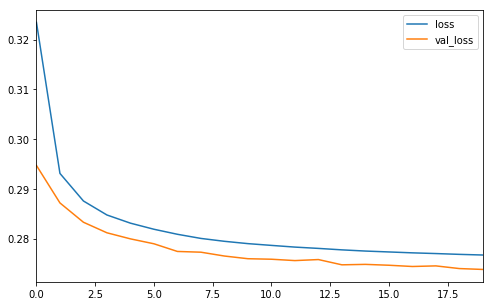

In [65]:
pd.DataFrame(h.history).plot(figsize = (8,5))

W0909 10:54:19.803369 4563617216 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


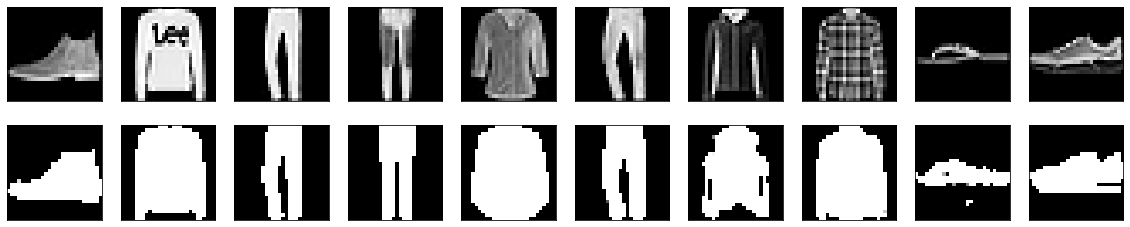

In [67]:
show_results(AC, X_test_flat)

#### Uma _segunda_ versao OO de um Autocodificador

In [27]:
class CodificadorModel(keras.Model):

    def __init__(self,
               latent_dim=32,
               inter_dim=64,
               name='codificador',
               **kwargs):
        super(CodificadorModel, self).__init__(name=name, **kwargs)
        self.h1 = keras.layers.Dense(inter_dim, activation='relu')
        self.h2 = keras.layers.Dense(latent_dim, activation='relu')
        
    def call(self, inputs):
        x = self.h1(inputs)
        return self.h2(x)

In [28]:
class DecodificadorModel(keras.Model):

    def __init__(self,
               out_dim,
               inter_dim=64,
               name='decodificador',
               **kwargs):
        super(DecodificadorModel, self).__init__(name=name, **kwargs)
        self.h1 = keras.layers.Dense(inter_dim, activation='relu')
        self.h2 = keras.layers.Dense(out_dim, activation='sigmoid')

    def call(self, inputs):
        x = self.h1(inputs)
        return self.h2(x)

In [29]:
class AutoCodificador2(keras.Model):
    def __init__(self,
               input_dim,
               inter_dim=64,
               latent_dim=32,
               name='autocodificador',
               **kwargs):
        super(AutoCodificador2, self).__init__(name=name, **kwargs)
        self.input_dim = input_dim
        self.codificador = CodificadorModel(latent_dim=latent_dim, inter_dim=inter_dim)
        self.decodificador = DecodificadorModel(input_dim, inter_dim=inter_dim)

    def call(self, inputs):
        z = self.codificador(inputs)
        reconstructed = self.decodificador(z)
        return reconstructed

In [30]:
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)
X_valid_flat = X_valid.reshape(-1, 784)

In [31]:
input_dim = 784
AC2 = AutoCodificador2(input_dim, 64, 32)

AC2.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
h = AC2.fit(X_train_flat, X_train_flat, 
           epochs = 10, shuffle=True,
           validation_data = (X_valid_flat, X_valid_flat))

W0909 15:35:29.971060 4553237952 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3227 - val_loss: 0.2965
Epoch 2/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2935 - val_loss: 0.2870
Epoch 3/10
55000/55000 [==============================] - 4s 82us/sample - loss: 0.2877 - val_loss: 0.2836
Epoch 4/10
55000/55000 [==============================] - 4s 79us/sample - loss: 0.2848 - val_loss: 0.2808
Epoch 5/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2830 - val_loss: 0.2798
Epoch 6/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2818 - val_loss: 0.2786
Epoch 7/10
55000/55000 [==============================] - 5s 90us/sample - loss: 0.2809 - val_loss: 0.2776
Epoch 8/10
55000/55000 [==============================] - 5s 89us/sample - loss: 0.2801 - val_loss: 0.2771
Epoch 9/10
55000/55000 [==============================] - 5s 85us/sample - loss: 0.2795 - val_loss: 0.2764
Epoch 10/10
55000/55000 [============

W0909 15:36:18.588220 4553237952 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


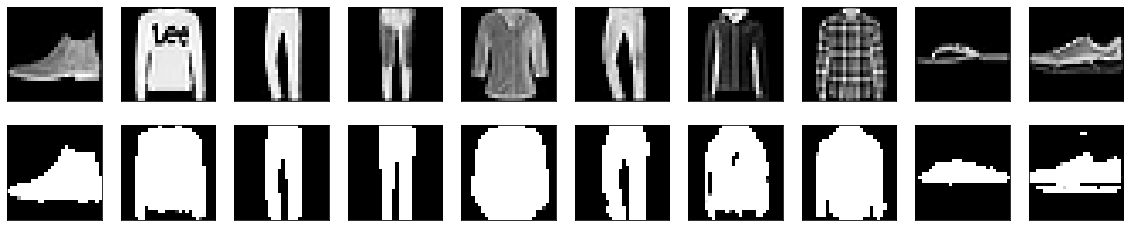

In [33]:
show_results(AC2, X_test_flat)

In [34]:
AC2.summary()

Model: "autocodificador"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
codificador (CodificadorMode multiple                  52320     
_________________________________________________________________
decodificador (Decodificador multiple                  53072     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


In [35]:
AC2.codificador.summary()

Model: "codificador"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  50240     
_________________________________________________________________
dense_10 (Dense)             multiple                  2080      
Total params: 52,320
Trainable params: 52,320
Non-trainable params: 0
_________________________________________________________________


In [36]:
AC2.decodificador.summary()

Model: "decodificador"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             multiple                  2112      
_________________________________________________________________
dense_12 (Dense)             multiple                  50960     
Total params: 53,072
Trainable params: 53,072
Non-trainable params: 0
_________________________________________________________________


In [37]:
AC2.codificador.predict(X_test_flat)

array([[ 408.37045, 1685.7874 , 1047.9489 , ...,  503.4626 ,  954.8291 ,
        1056.1184 ],
       [1531.821  , 1517.3966 ,  994.04504, ...,  830.195  , 1608.667  ,
         538.6834 ],
       [ 706.51855, 2005.4934 ,  264.63602, ..., 1498.9434 , 1679.512  ,
         865.2439 ],
       ...,
       [ 552.08875,  476.03812,  511.4279 , ...,  818.1265 ,   64.44817,
         616.2263 ],
       [ 331.77658, 1610.73   ,  505.1539 , ...,  536.7629 , 1299.4698 ,
         328.71622],
       [ 357.6492 ,  472.1714 ,  522.478  , ...,  165.64249,  393.19507,
         623.5111 ]], dtype=float32)

#### Keras em _eager mode_

In [52]:
AC3 = AutoCodificador2(input_dim, 64, 32) #, dynamic = True)

AC3.compile(optimizer='adam', loss='binary_crossentropy', run_eagerly = True)

In [53]:
h = AC3.fit(X_train_flat, X_train_flat, 
           epochs = 2, shuffle=True,
           validation_data = (X_valid_flat, X_valid_flat))

W0909 15:48:27.914067 4553237952 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/2
55000/55000 [==============================] - 26s 480us/sample - loss: 0.3233 - val_loss: 0.2949
Epoch 2/2
55000/55000 [==============================] - 26s 477us/sample - loss: 0.2929 - val_loss: 0.2870


#### Meu próprio mecanimo de treino

In [177]:
class AutoCodificador3(keras.Model):
    def __init__(self,
               input_dim,
               inter_dim=64,
               latent_dim=32,
               name='autocodificador',
               **kwargs):
        super(AutoCodificador3, self).__init__(name=name, **kwargs)
        self.input_dim = input_dim
        self.codificador = CodificadorModel(latent_dim=latent_dim, inter_dim=inter_dim)
        self.decodificador = DecodificadorModel(input_dim, inter_dim=inter_dim)
        self.opt = tf.optimizers.SGD(learning_rate=0.1, momentum=0.9)
        
    def call(self, inputs):
        z = self.codificador(inputs)
        reconstructed = self.decodificador(z)
        return reconstructed
    
    def loss(self, X):
        code = self.call(X)
        rec_error = tf.reduce_mean(tf.square(tf.subtract(code, X)))
        return rec_error        
    
    def compile(self, optimizer = None):
        if optimizer is not None:
            self.opt = optimizer
        return
    
    #@tf.function
    def fit(self, X_train, epochs = 10, batch_size = 32):
        training_db = tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size)
        for epoch in range(epochs):
            # tf.print('epoch: %d' % (epoch))
            print('epoch: %d' % (epoch))
            for step, X_batch in enumerate(training_db):
                with tf.GradientTape() as tape:
                    gradients = tape.gradient(self.loss(X_batch), self.trainable_variables)
                    gradient_vars = zip(gradients, self.trainable_variables)
                    self.opt.apply_gradients(gradient_vars) 
                if step == 0:
                    show_results(self, X_batch.numpy()[:10]) # so modo eager -- plt nao eh compilada por TF
        # tf.print('last batch of epoch: %d' % (epoch))
        print('last batch of epoch: %d' % (epoch))
        #show_results(self, X_batch.numpy()[:10]) # erro com @tf.function --> X_batch tem que ser iniciado antes do loop
        return

In [178]:
AC3 = AutoCodificador3(input_dim, 64, 32) 

In [179]:
opt = tf.optimizers.SGD(learning_rate=0.1, momentum=0.9)

AC3.compile(optimizer = opt)

In [180]:
X_train_flat_tf = tf.constant(X_train_flat, dtype=tf.float32) # necessario pois X_train_flat eh np.float64 != tf.float32 (64x32)

epoch: 0


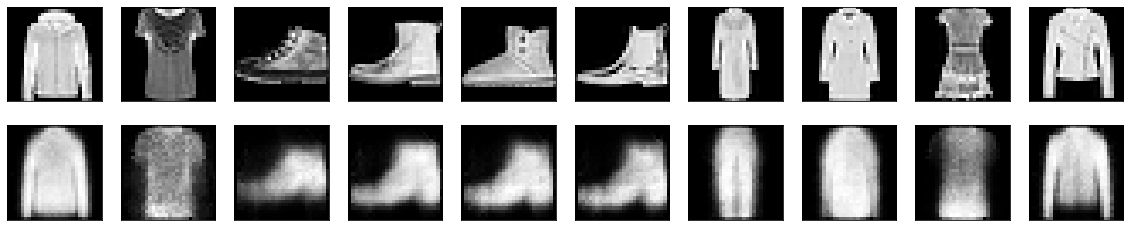

epoch: 1


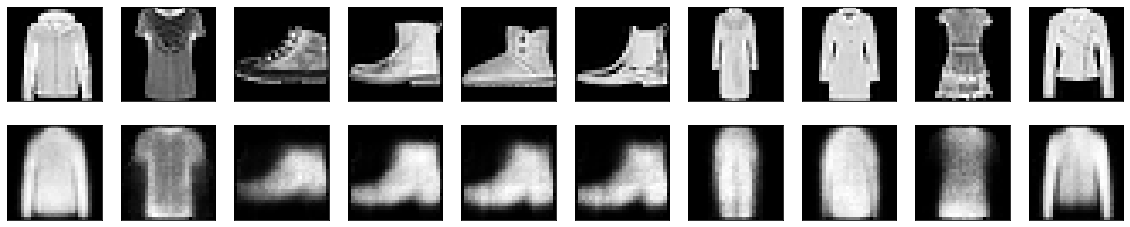

last batch of epoch: 1


In [182]:
AC3.fit(X_train_flat_tf, epochs = 2)

In [318]:
class AutoCodificador4(keras.Model):
    def __init__(self,
               input_dim,
               inter_dim=64,
               latent_dim=32,
               name='autocodificador',
               **kwargs):
        super(AutoCodificador4, self).__init__(name=name, **kwargs)
        self.input_dim = input_dim
        self.codificador = CodificadorModel(latent_dim=latent_dim, inter_dim=inter_dim)
        self.decodificador = DecodificadorModel(input_dim, inter_dim=inter_dim)
        self.opt = tf.optimizers.SGD(learning_rate=0.1, momentum=0.9)
        
    def call(self, inputs):
        z = self.codificador(inputs)
        reconstructed = self.decodificador(z)
        return reconstructed
    
    def loss(self, X):
        code = self.call(X)
        rec_error = tf.reduce_mean(tf.square(tf.subtract(code, X)))
        return rec_error        
    
    def compile(self, optimizer = None):
        if optimizer is not None:
            self.opt = optimizer
        return
    
    @tf.function
    def fit(self, X_train, epochs = 10, batch_size = 32):
        training_db = tf.data.Dataset.from_tensor_slices(X_train).batch(batch_size)
        num_batches = len(X_train) // batch_size
        
        writer = tf.summary.create_file_writer('tmp')
        with writer.as_default():
            with tf.summary.record_if(True):
                for epoch in range(epochs):
                    for step, X_batch in enumerate(training_db):
                        with tf.GradientTape() as tape:
                            gradients = tape.gradient(self.loss(X_batch), self.trainable_variables)
                            gradient_vars = zip(gradients, self.trainable_variables)
                            self.opt.apply_gradients(gradient_vars) 
                        loss_values = self.loss(X_batch)
                        g_step = step + num_batches * epoch
                        tf.summary.scalar('loss', loss_values, step=g_step)
                    X_batch_img = tf.reshape(X_batch, (X_batch.shape[0], 28, 28, 1))
                    X_batch_rec = tf.reshape(self.call(tf.Variable(X_batch)), (X_batch.shape[0], 28, 28, 1))
                    tf.summary.image('original', X_batch_img, max_outputs=10, step=g_step)
                    tf.summary.image('reconstructed', X_batch_rec, max_outputs=10, step=g_step)
        return

In [319]:
!\rm -r tmp

In [320]:
AC4 = AutoCodificador4(input_dim, 64, 32) 

In [321]:
opt = tf.optimizers.SGD(learning_rate=0.1, momentum=0.9)

AC4.compile(optimizer = opt)

In [322]:
AC4.fit(X_train_flat_tf, epochs = 2)

StagingError: in converted code:

    <ipython-input-318-19cfe0f9a534>:39 fit  *
        for step, X_batch in enumerate(training_db):

    UnboundLocalError: local variable 'X_batch' referenced before assignment


In [294]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [295]:
%tensorboard --logdir=tmp

Reusing TensorBoard on port 6006 (pid 32978), started 0:02:15 ago. (Use '!kill 32978' to kill it.)